In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
ath=pd.read_csv('athlete_events.csv')
noc= pd.read_csv('noc_regions.csv')

In [3]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
ath.shape

(271116, 15)

In [6]:
noc.shape

(230, 3)

In [7]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


##### standard deviation seem very high in age column
##### min and max age is seem unreal in olympics 
###### min weight is also unreal 

In [9]:
merged= pd.merge(ath ,noc , on = 'NOC', how = 'left')
merged.shape

(271116, 17)

In [10]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


###### Age columns => 14% data are missing 
######  height column => 22 % 
###### weight column => 23% 
######  Medal  column => 85 % 
###### notes column => 98 % 

In [11]:
merged.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [12]:
 266077/271116

0.9814138597500701

######  the missing value in medal column are that athlete who have not  won any medal in game so i replace them to NAN to no medal 

In [13]:
merged['Medal'].fillna('No Medal', inplace=True)
merged.drop('notes',axis=1, inplace= True)

In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
 15  region  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.2+ MB


#####  Which gender has more medals/gold medal 

In [15]:
merged.groupby('Sex')['Medal'].count()

Sex
F     74522
M    196594
Name: Medal, dtype: int64

In [16]:
golddf=merged[merged['Medal']=="Gold"]

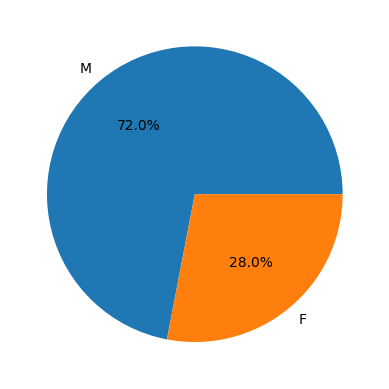

In [17]:
golddf_count= golddf['Sex'].value_counts()
plt.pie(golddf_count ,labels=golddf_count.index, autopct='%1.1f%%')
plt.show()

##### Which team has more gold medal - Team gold medal distribution

In [18]:
gold_df_count=golddf.groupby('Team')['Medal'].count().reset_index()

In [19]:
gold_df_count=gold_df_count.sort_values(by='Medal',ascending=False)

 #### Teams according to game & weight. 

In [20]:
teams_df = merged[['Games', 'Sport', 'Team', 'Weight', 'Medal']]

In [21]:
gold_teams_df = teams_df[teams_df['Medal'] == 'Gold']

In [22]:
# group by games, sport, team, and weight, and count the number of gold medals
grouped_teams_df = gold_teams_df.groupby(['Games', 'Sport', 'Team', 'Weight']).size().reset_index(name='Gold Medals')

In [23]:
# create a pivot table with games and weights as the index, and teams as the columns
pivot_df = grouped_teams_df.pivot_table(index=['Games', 'Weight'], columns='Team', values='Gold Medals')

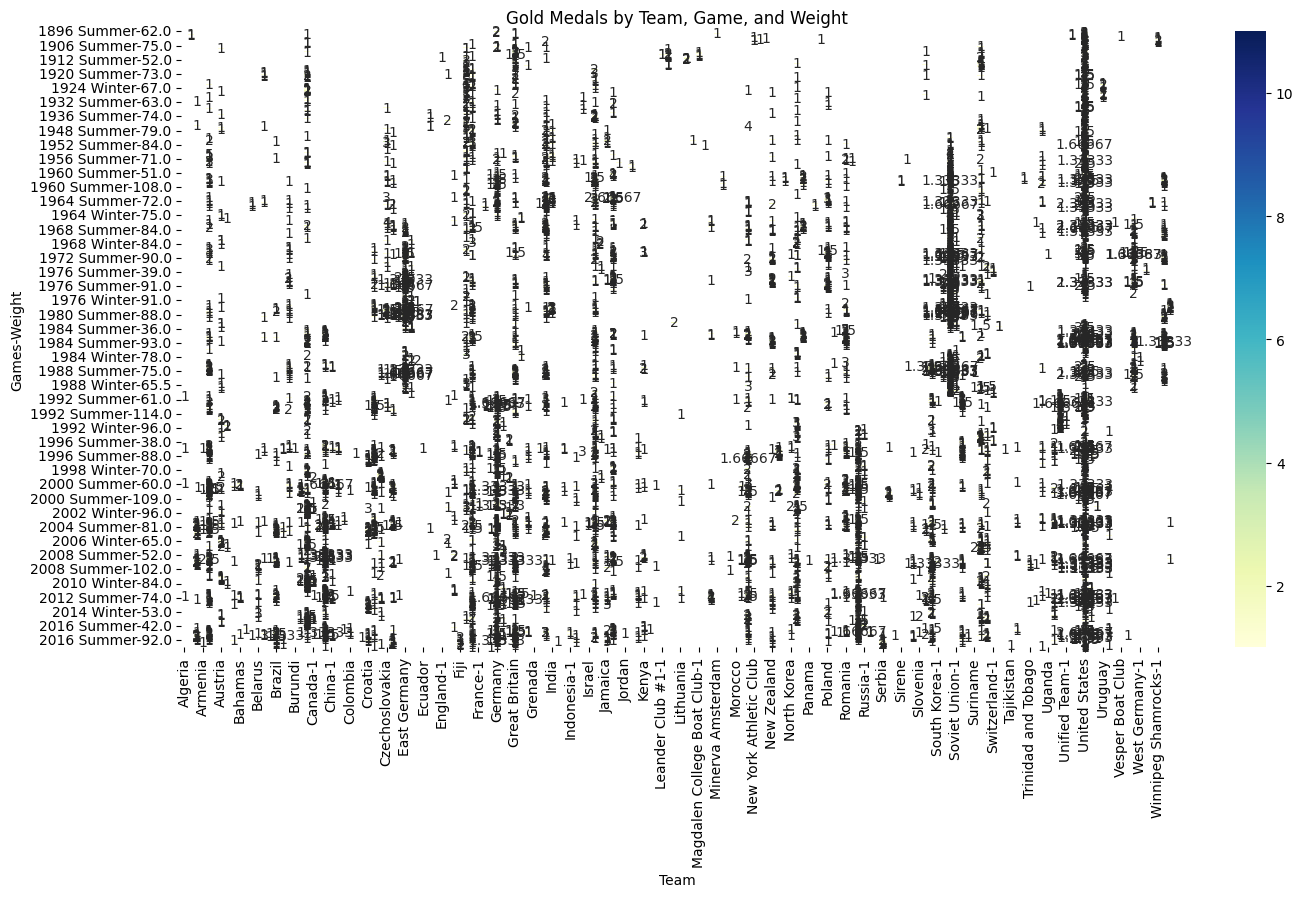

In [24]:
plt.figure(figsize=(16, 8))
plt.title('Gold Medals by Team, Game, and Weight')
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='g')
plt.show()

###### Age and game analysis

In [25]:
age_game= merged.drop_duplicates()

In [26]:
age_game_count=age_game.groupby(['Age','Sport']).size().reset_index(name='count')

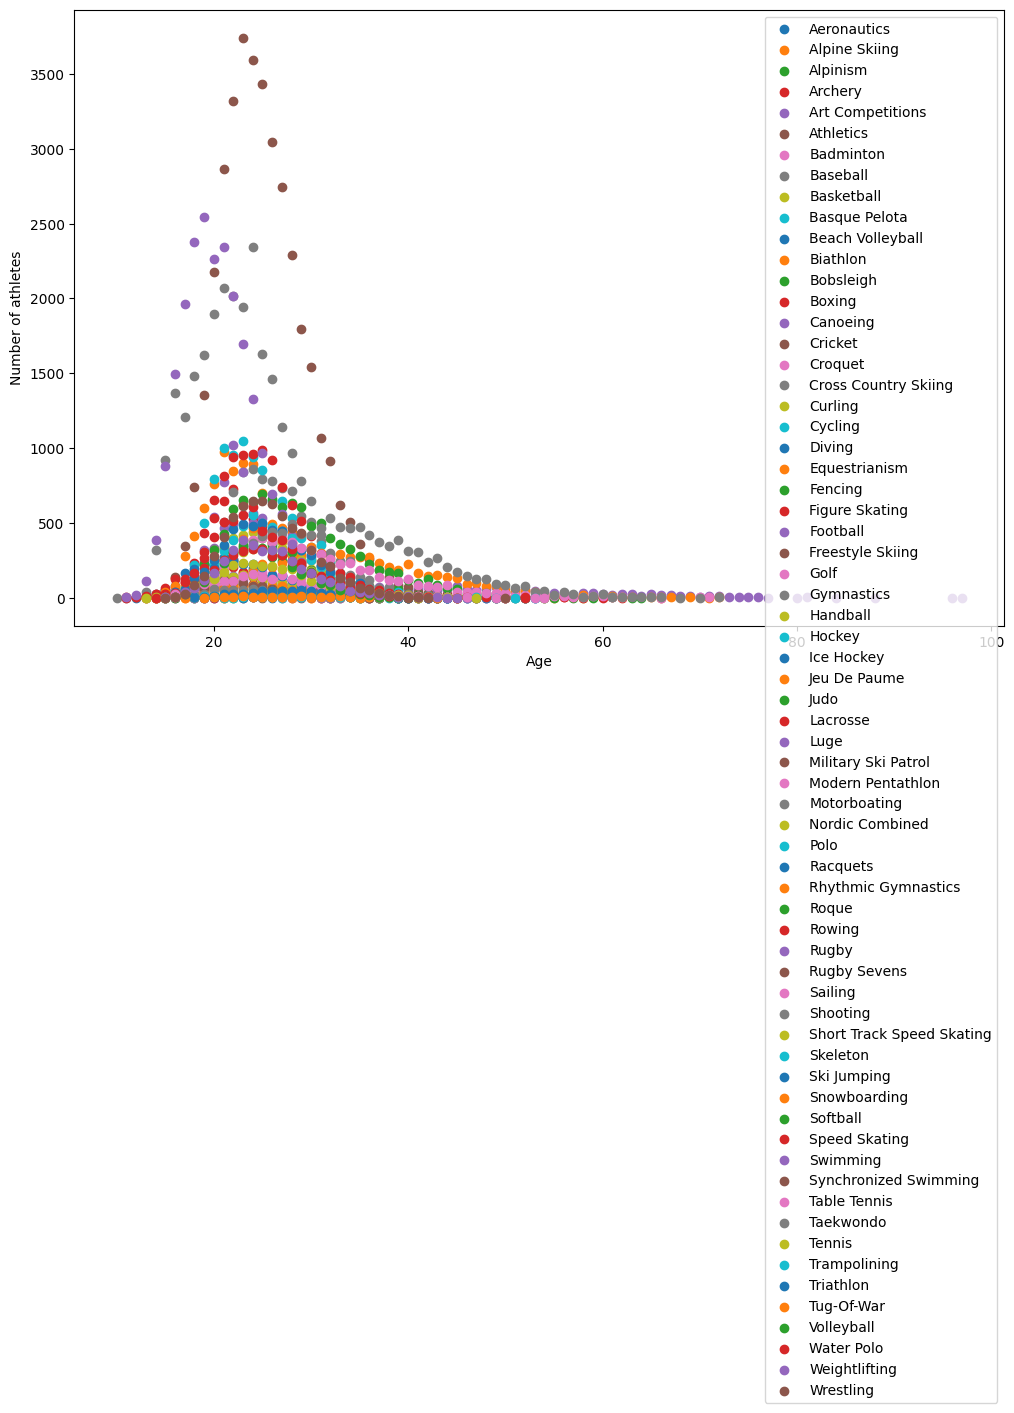

In [27]:
fig ,ax = plt.subplots(figsize=(12,8))
for sport ,group in age_game_count.groupby('Sport'):
    ax.scatter(group['Age'],group['count'],label=sport)
ax.set_xlabel('Age')
ax.set_ylabel('Number of athletes')
ax.legend()
plt.show()

###### Which sport brings more gold medals 



In [28]:
top_sports=golddf.groupby('Sport')['Medal'].count().reset_index(name='Gold count').sort_values(by='Gold count',ascending=False).head(10)

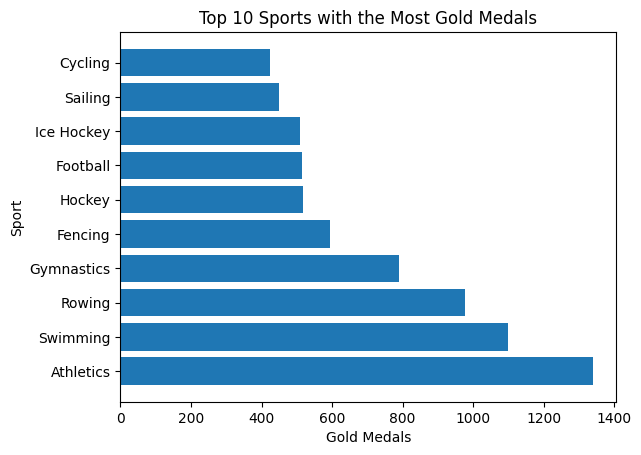

In [29]:
plt.barh(top_sports['Sport'],top_sports['Gold count'])
plt.xlabel('Gold Medals')
plt.ylabel('Sport')
plt.title('Top 10 Sports with the Most Gold Medals')
plt.show()








##### Ideal height, weight for gold medal -- Ideal BMI ?

In [30]:
sport_grouped=golddf.groupby('Sport')

In [31]:
avg_height=sport_grouped['Height'].mean()
avg_weight=sport_grouped['Weight'].mean()

In [32]:
avg_bmi= avg_weight/((avg_height/100)**2)

In [33]:
# Create a table to display the results
result_table = pd.DataFrame({
    'Average Height (cm)': avg_height,
    'Average Weight (kg)': avg_weight,
    'Average BMI': avg_bmi
})

In [34]:
print(result_table)

                  Average Height (cm)  Average Weight (kg)  Average BMI
Sport                                                                  
Aeronautics                       NaN                  NaN          NaN
Alpine Skiing              173.918033            72.785124    24.063201
Alpinism                          NaN                  NaN          NaN
Archery                    173.630769            71.140625    23.597408
Art Competitions           176.000000            75.000000    24.212293
...                               ...                  ...          ...
Tug-Of-War                 180.500000            93.750000    28.775101
Volleyball                 187.170886            80.544304    22.991020
Water Polo                 185.708772            86.081784    24.960106
Weightlifting              166.748634            81.151442    29.185805
Wrestling                  172.597484            76.261006    25.599625

[66 rows x 3 columns]


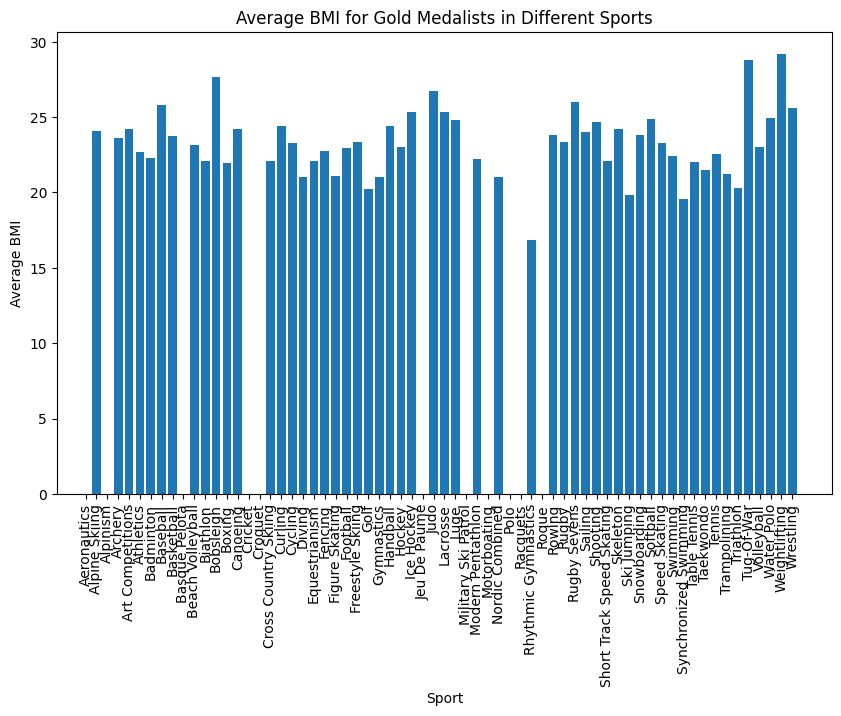

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(avg_bmi.index, avg_bmi)
plt.xticks(rotation=90)
plt.title('Average BMI for Gold Medalists in Different Sports')
plt.xlabel('Sport')
plt.ylabel('Average BMI')
plt.show()

##### City with medals ?

In [36]:
city_medal=merged.groupby('City')['Medal'].count().reset_index().sort_values('Medal',ascending=False).head(20)

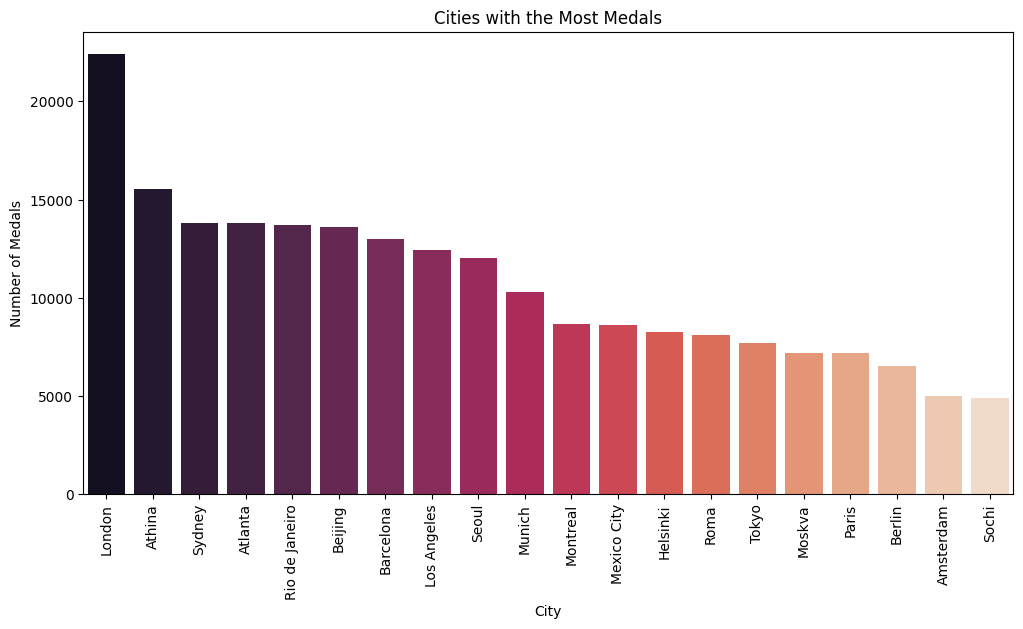

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Medal', data=city_medal, palette='rocket')
plt.xticks(rotation=90)
plt.title('Cities with the Most Medals')
plt.xlabel('City')
plt.ylabel('Number of Medals')
plt.show()

##### Age group and inclination towards sports 

In [38]:
grouped_df=merged.groupby(['Sport',pd.cut(merged.Age , range(0,100,10))]).count()

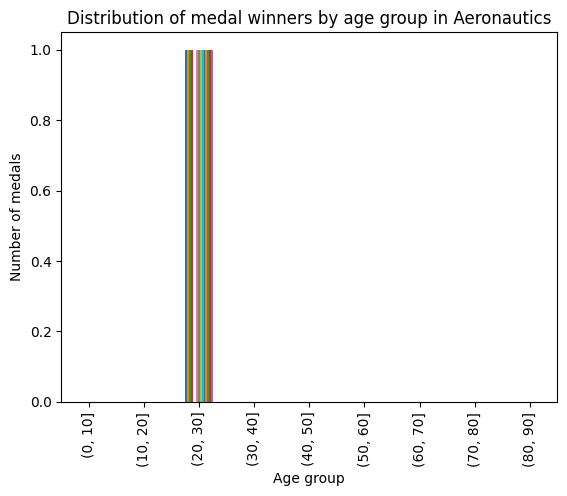

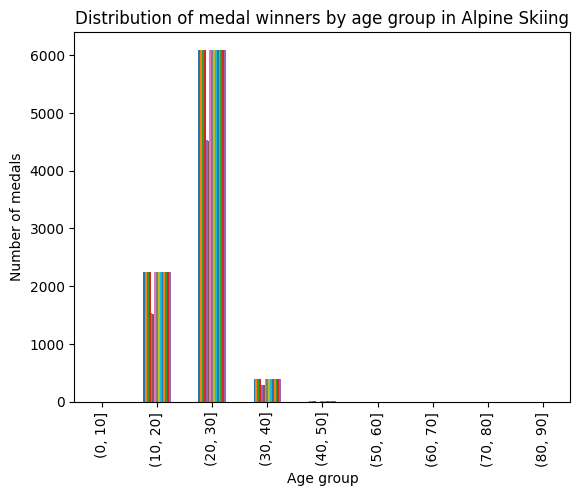

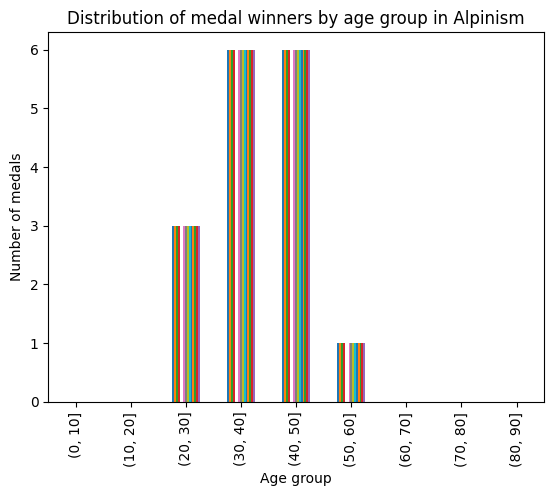

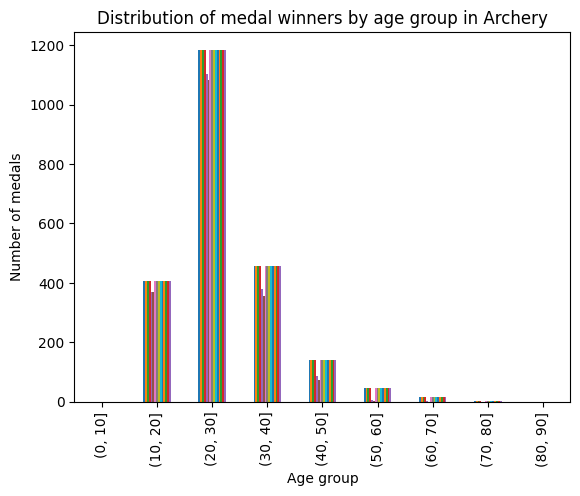

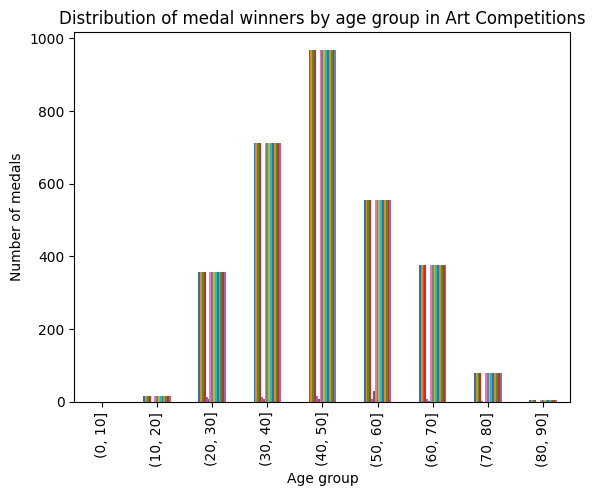

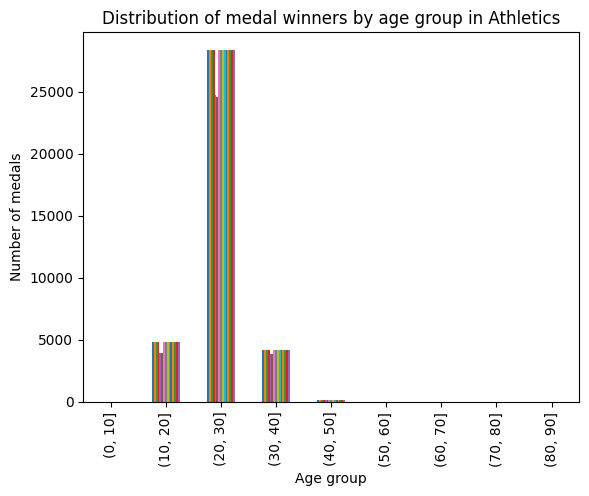

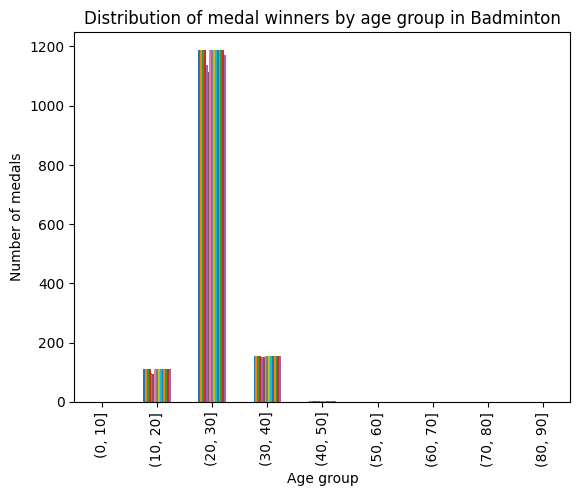

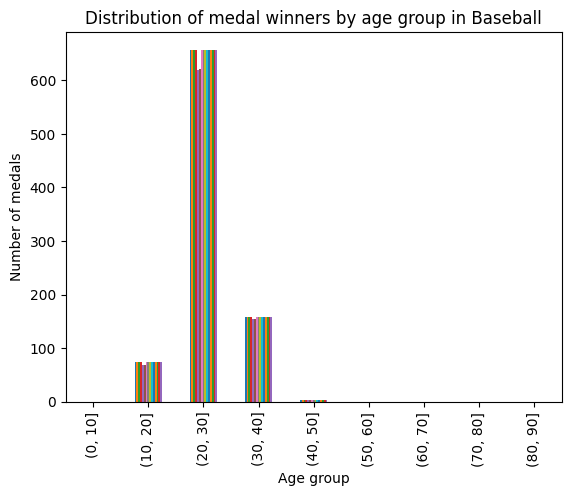

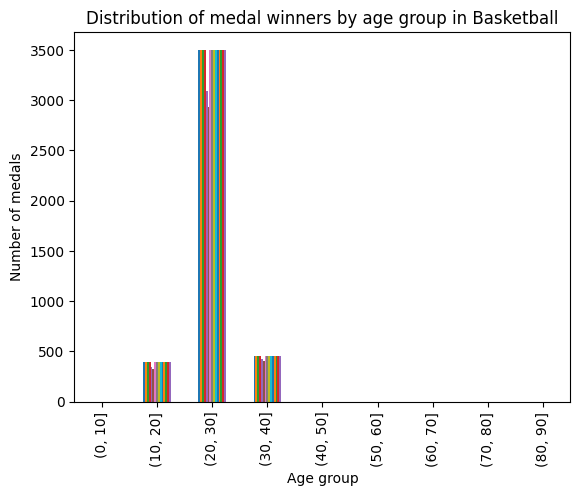

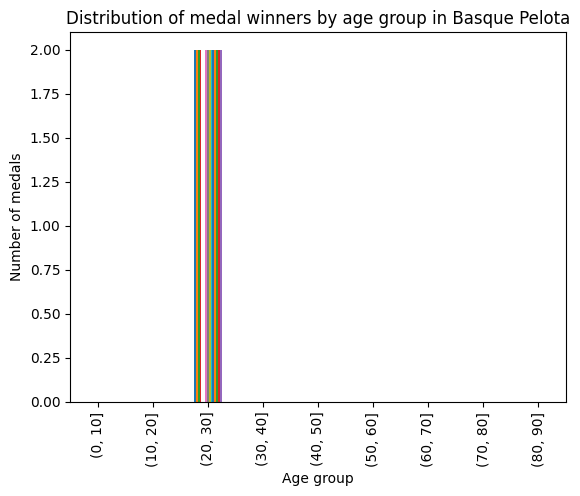

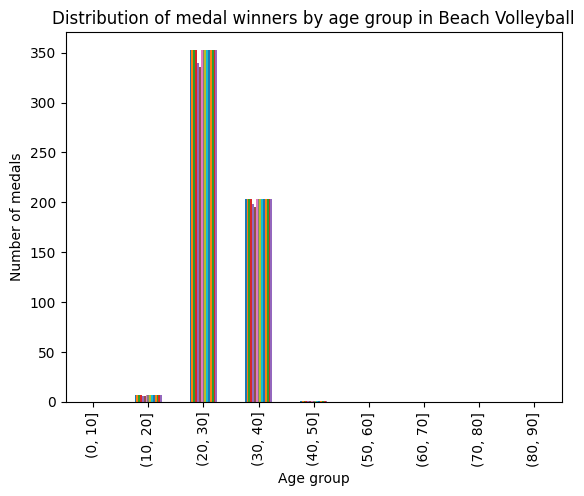

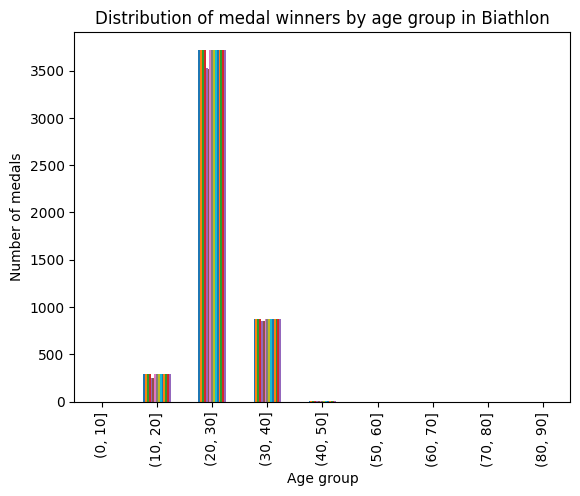

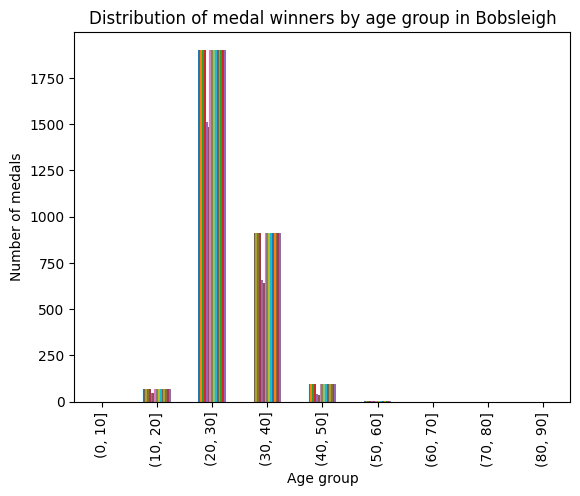

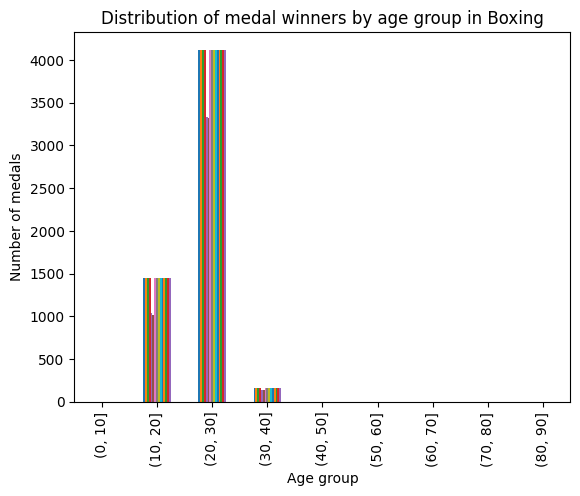

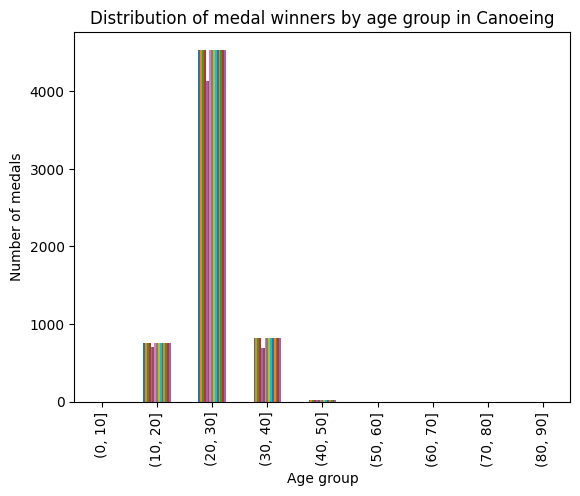

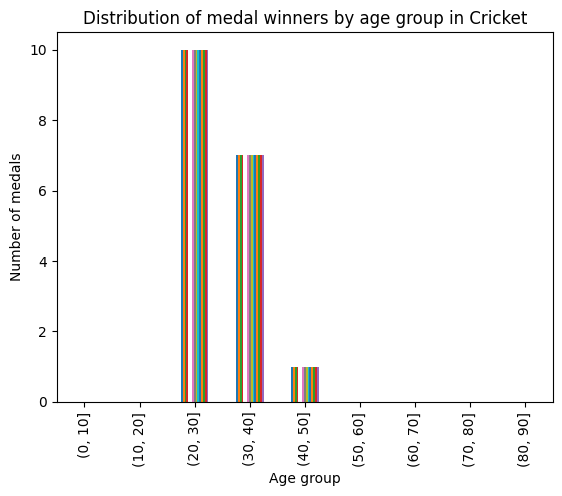

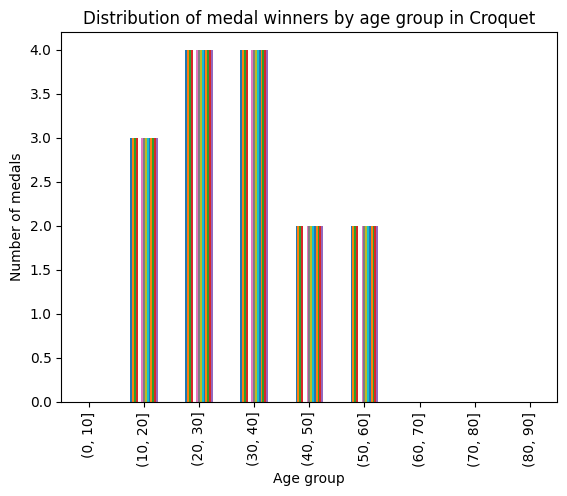

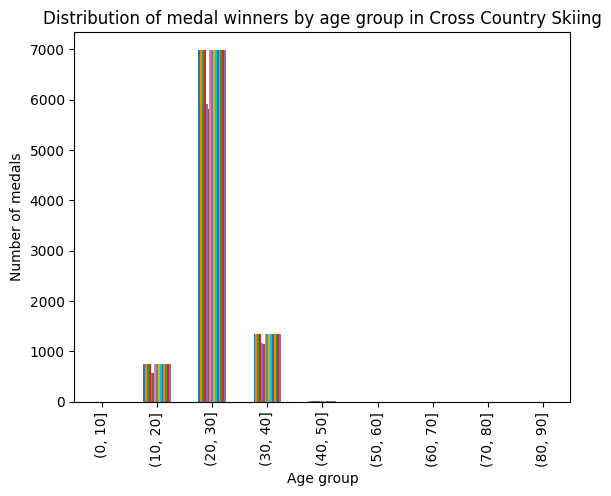

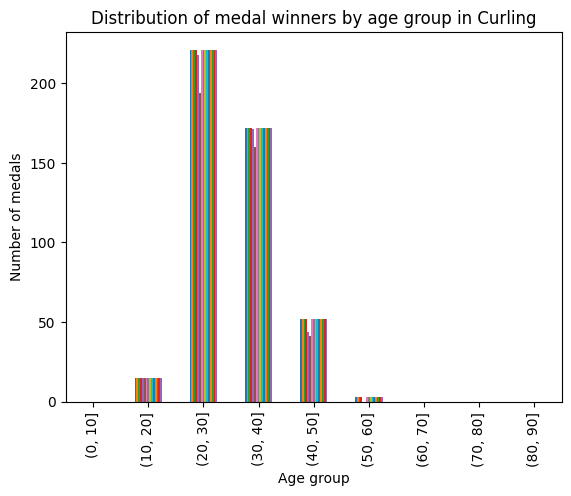

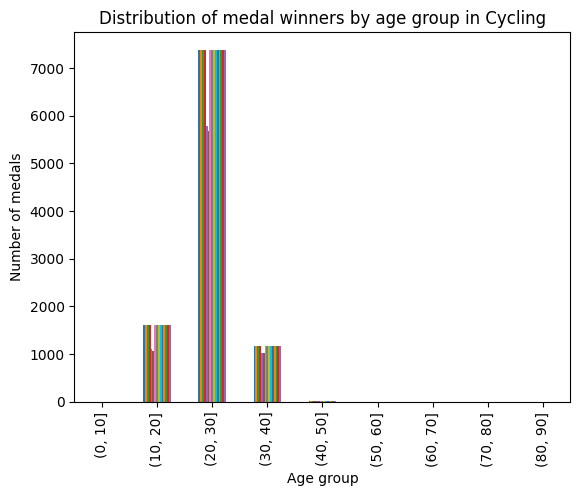

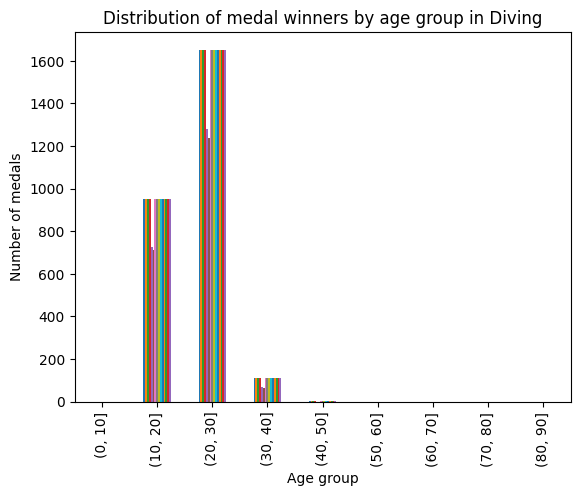

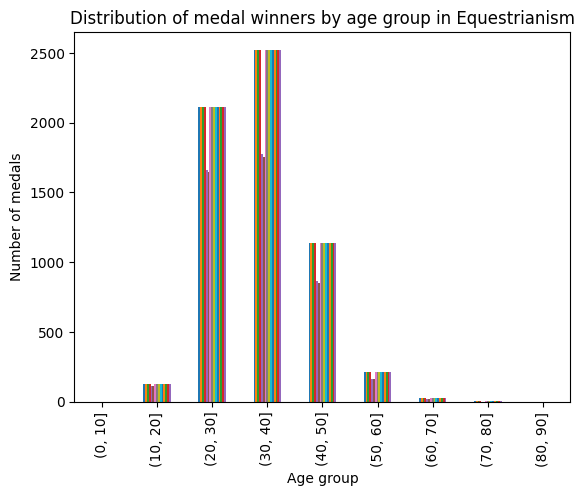

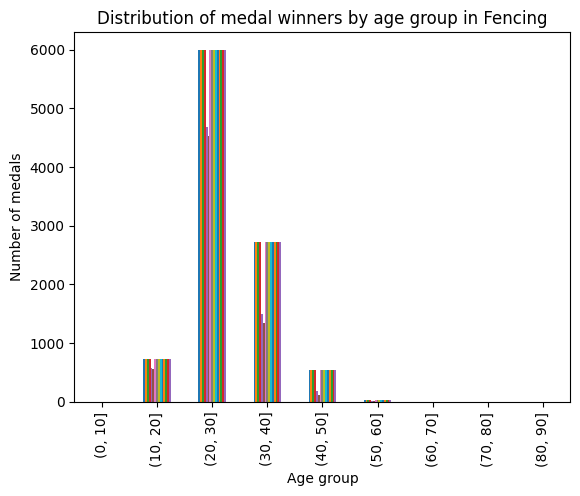

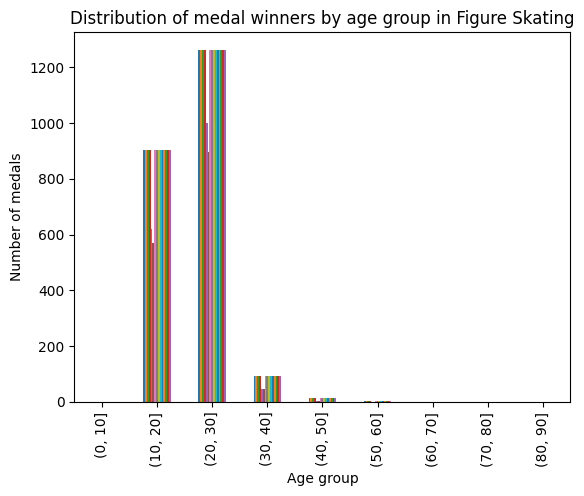

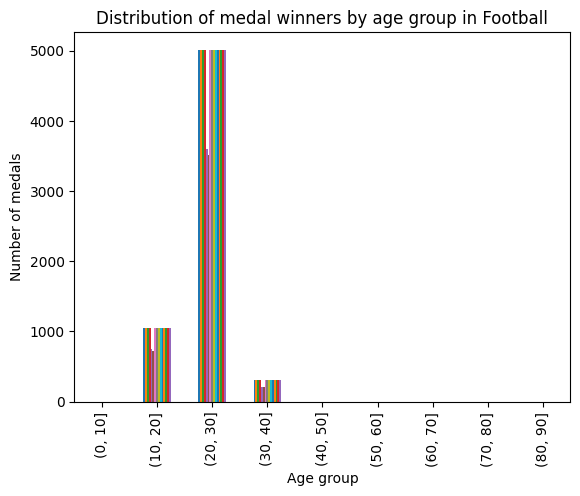

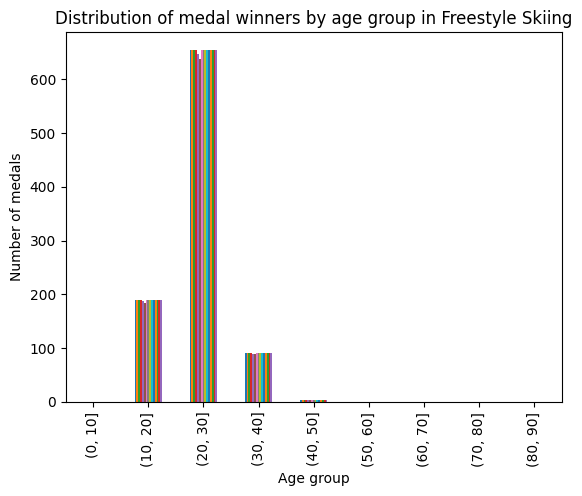

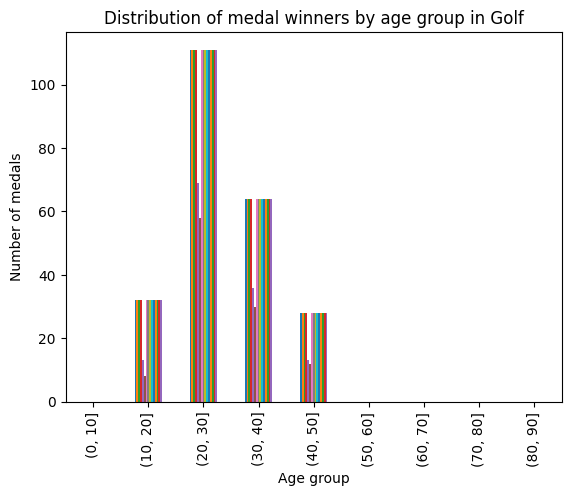

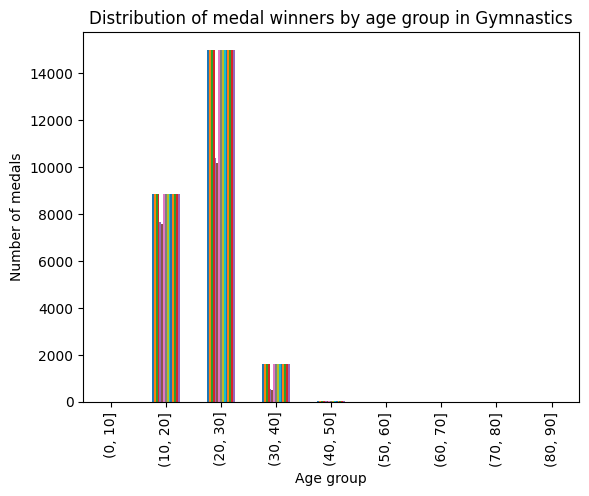

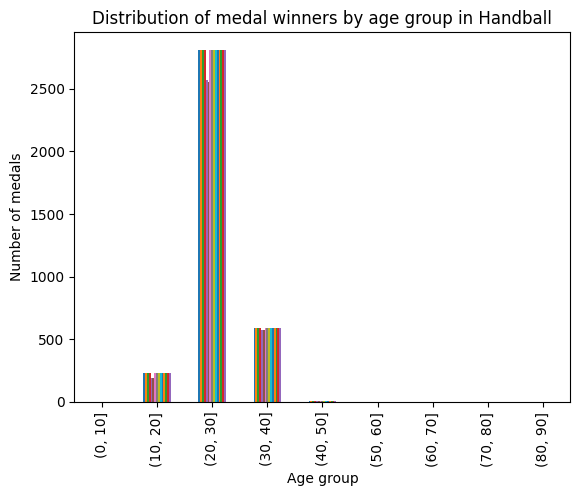

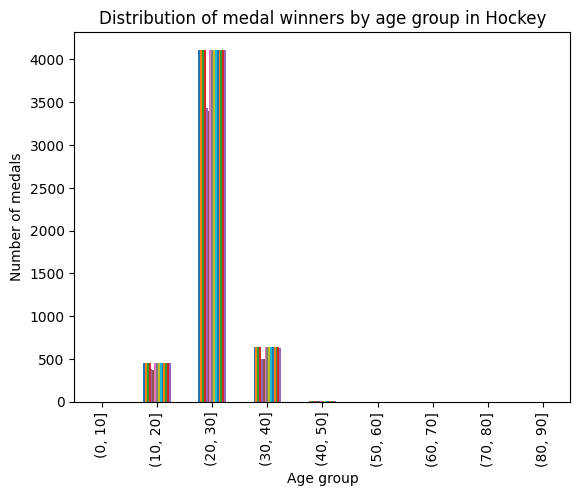

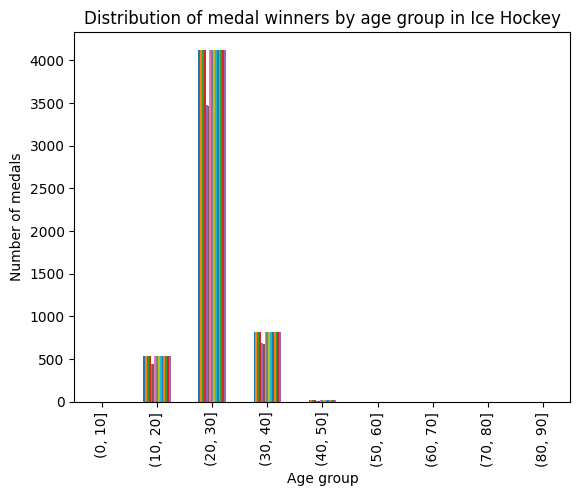

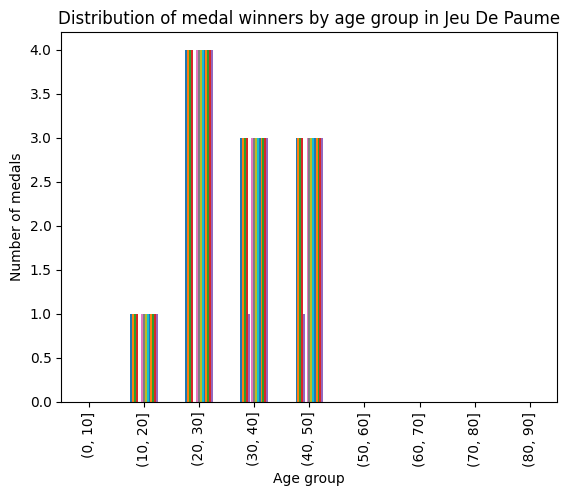

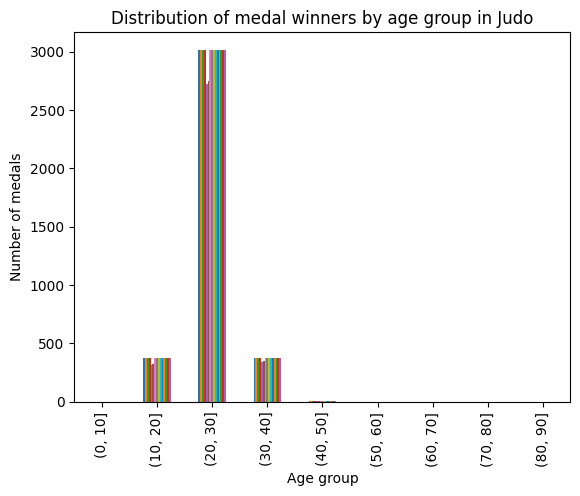

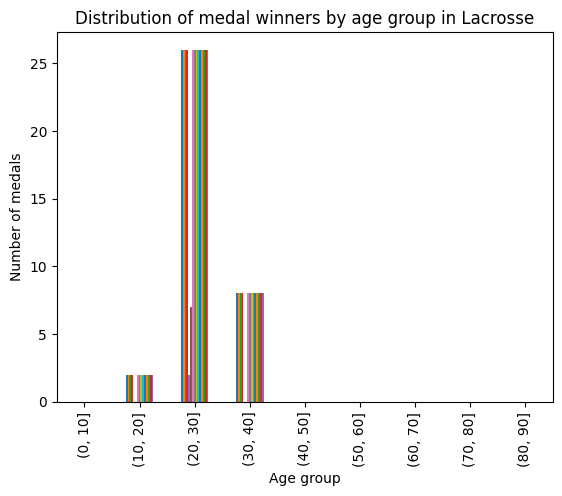

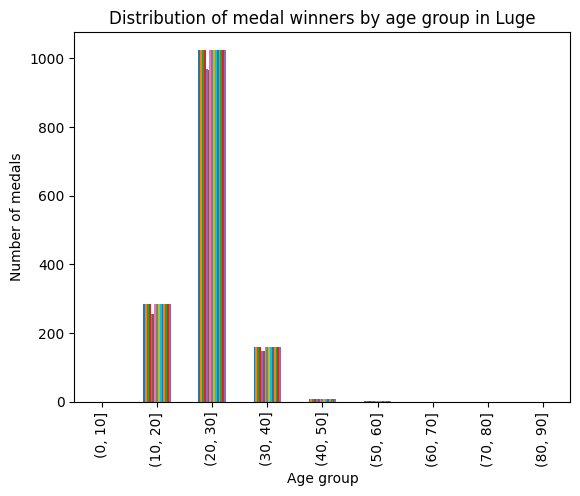

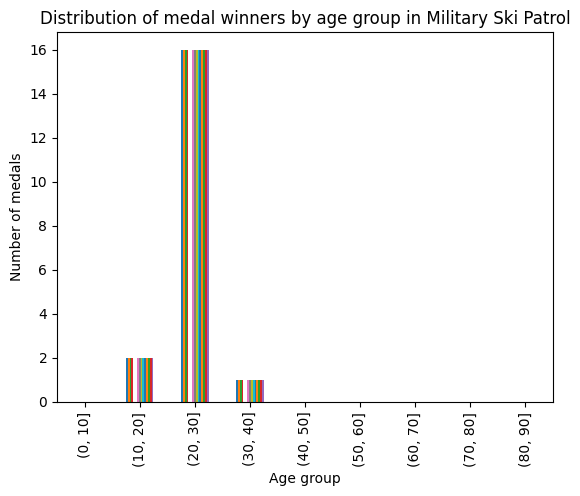

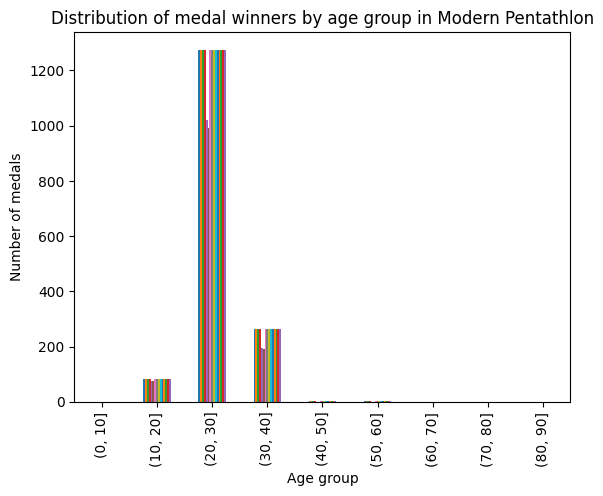

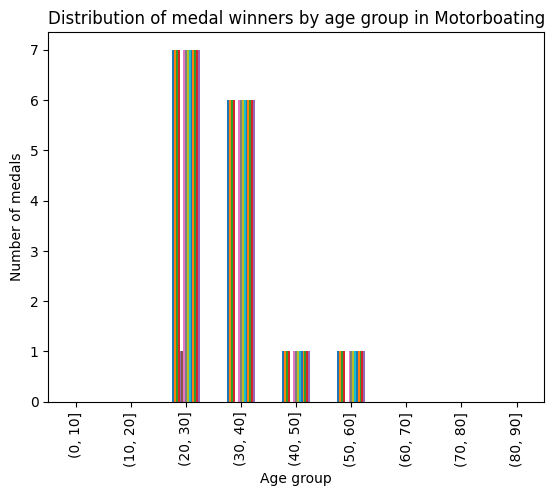

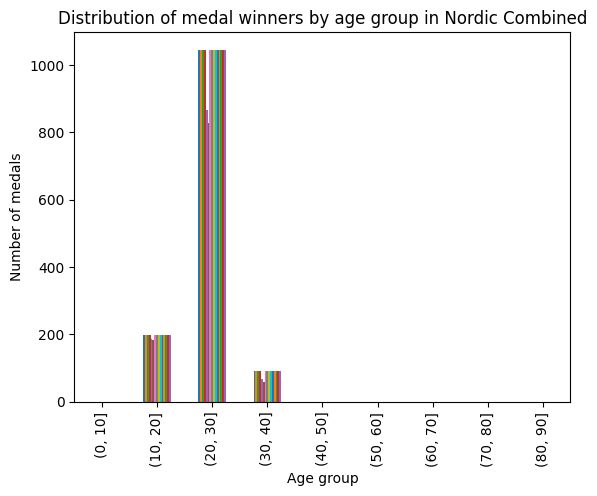

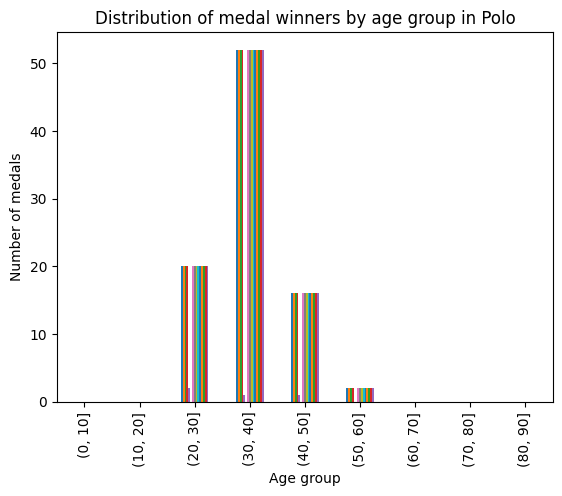

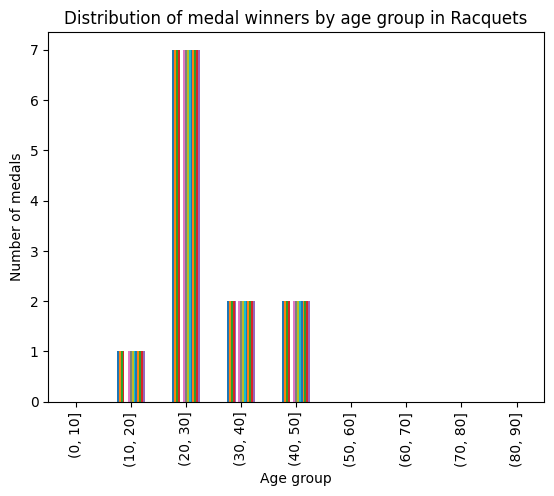

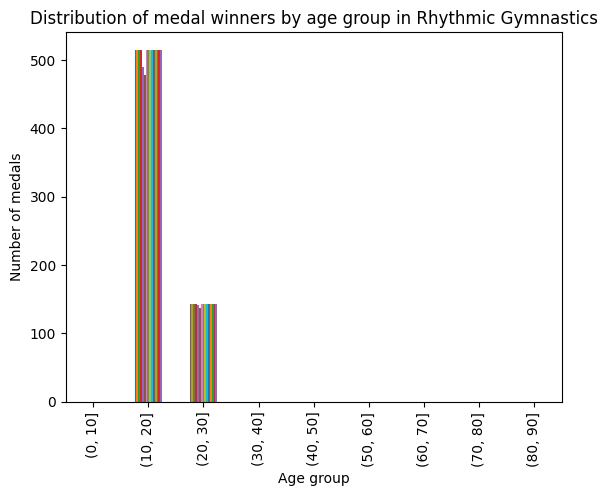

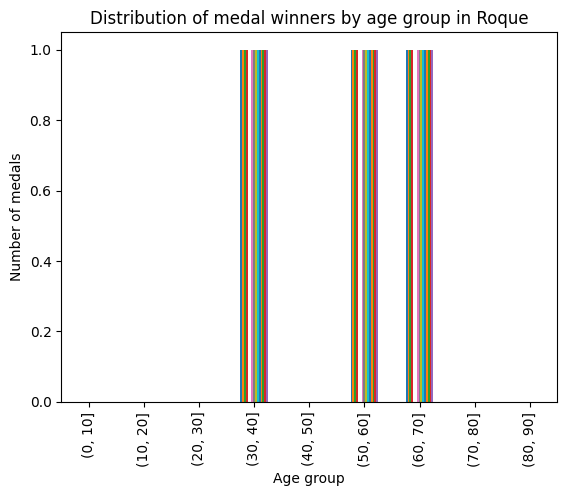

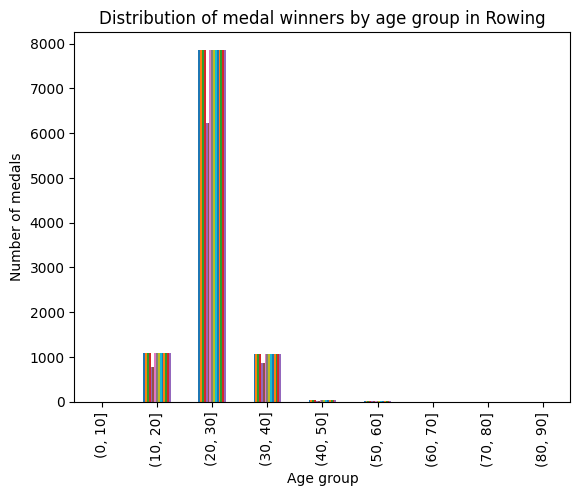

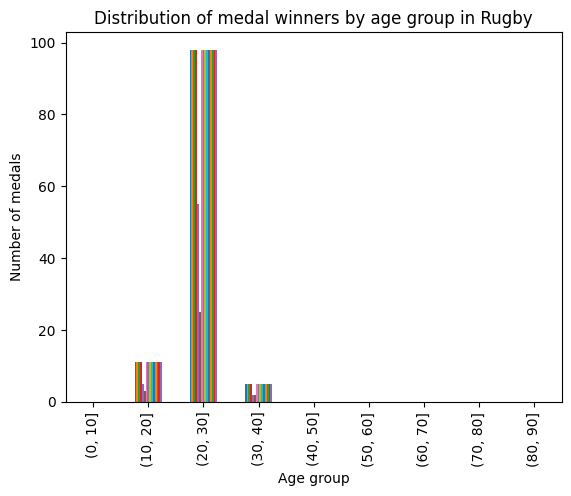

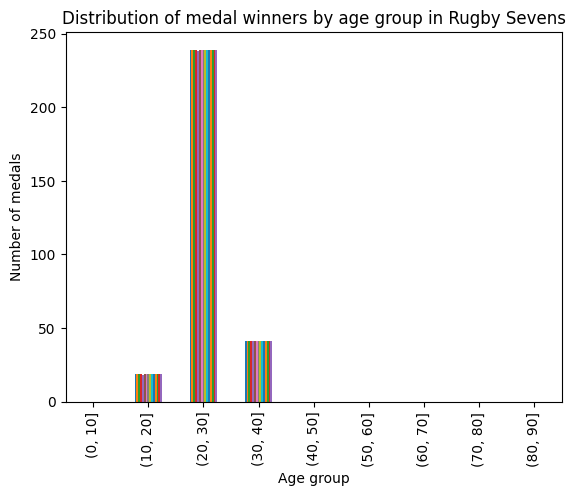

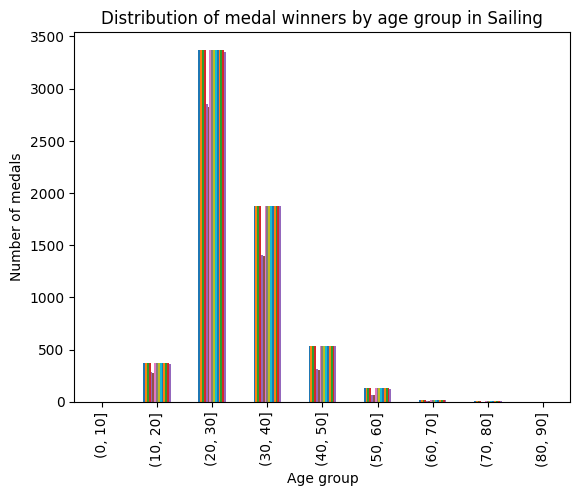

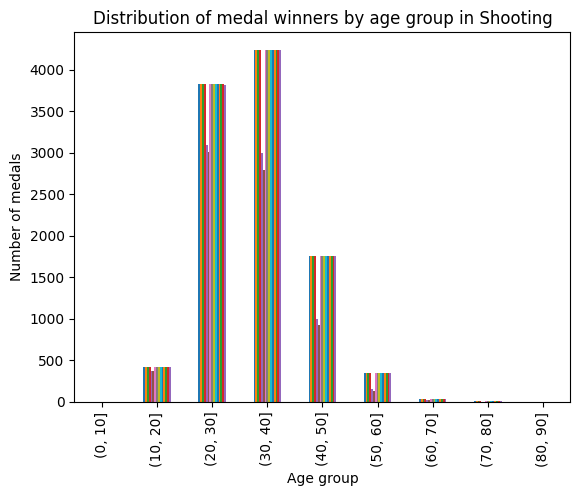

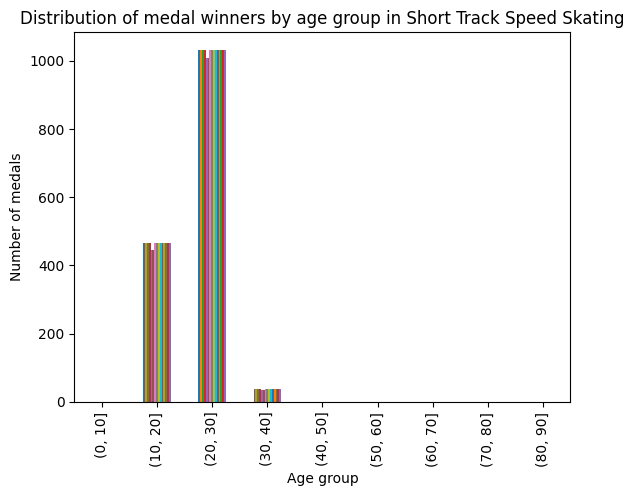

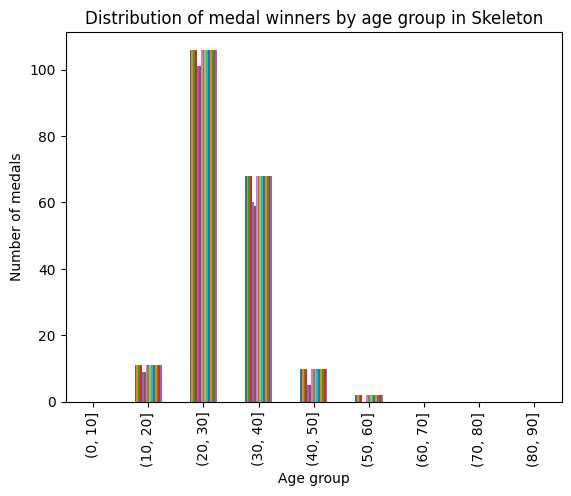

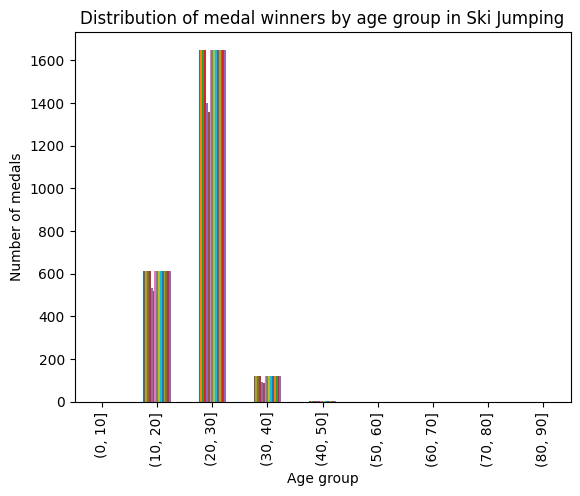

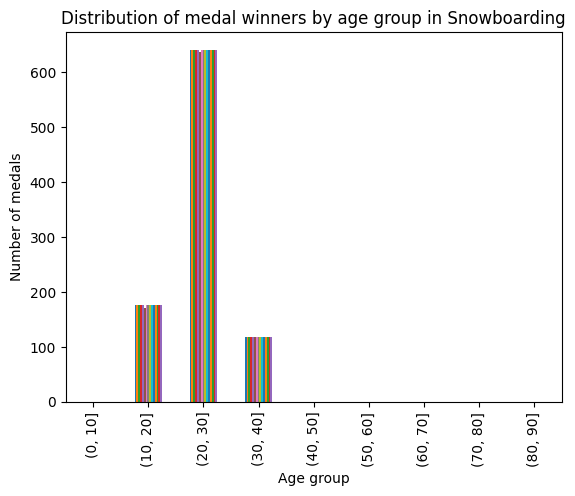

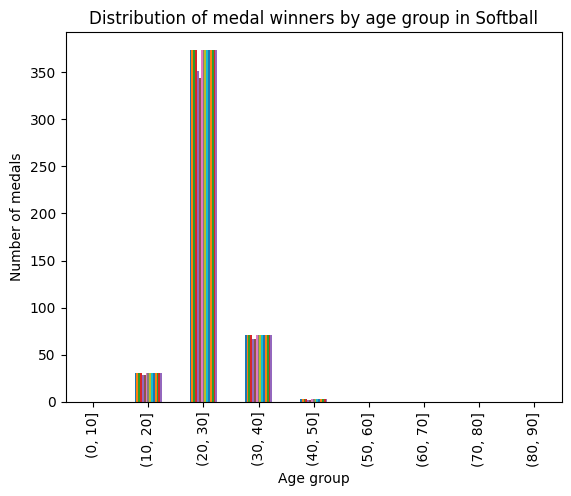

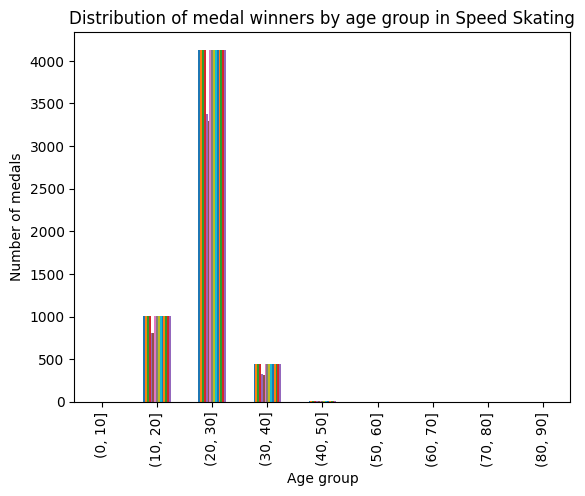

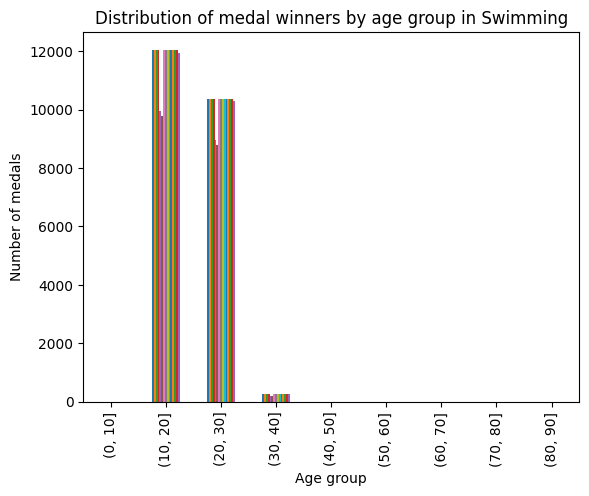

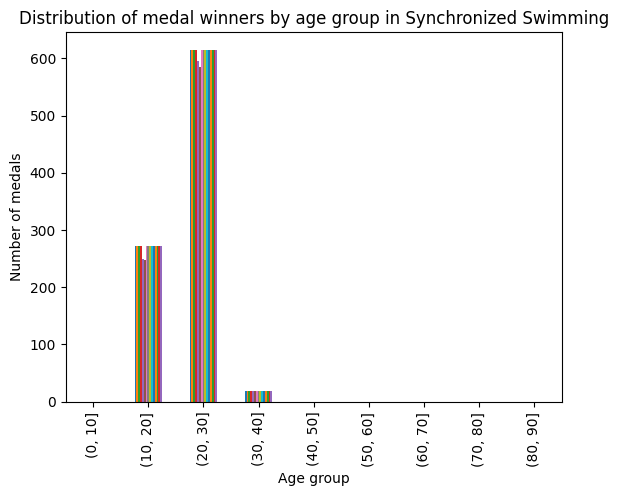

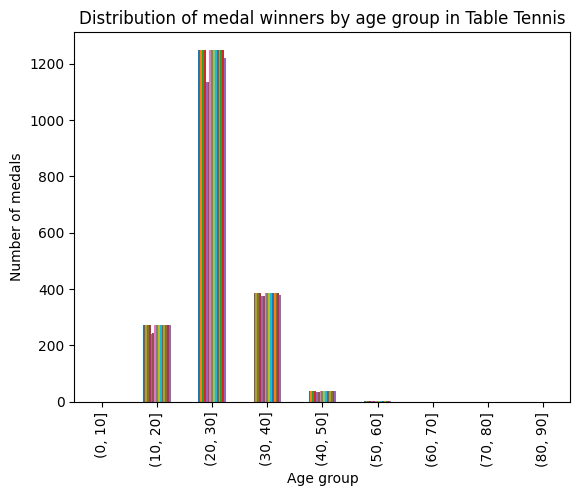

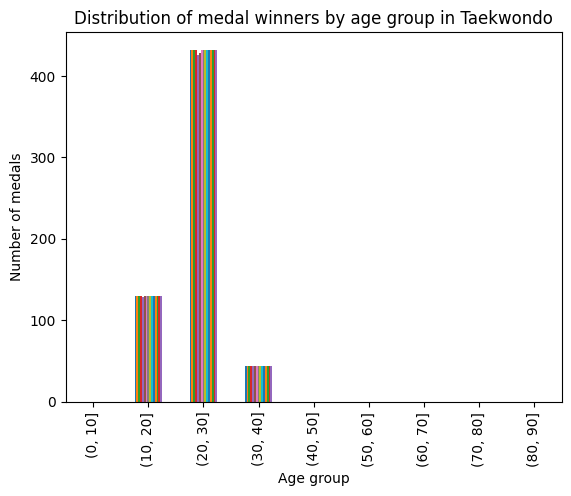

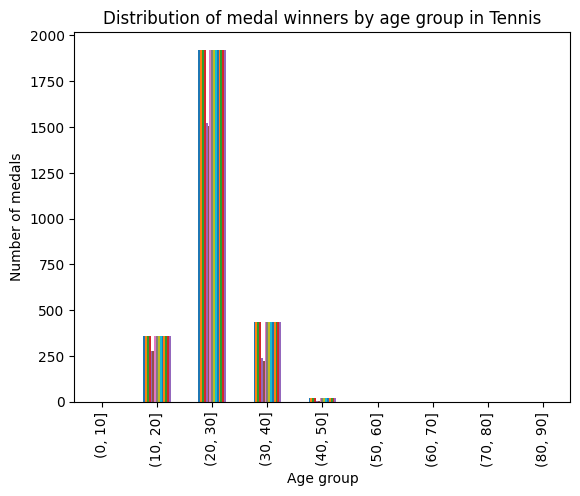

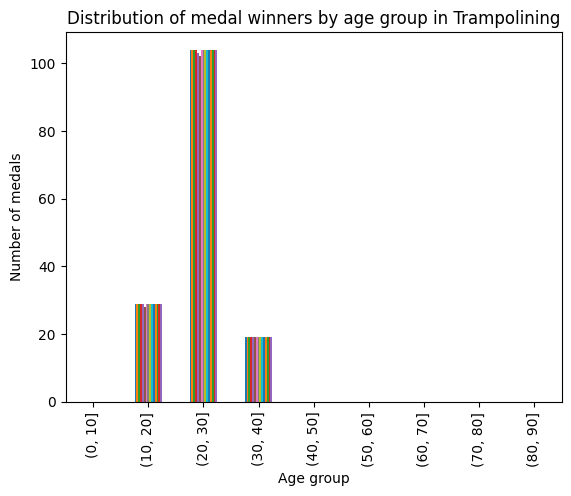

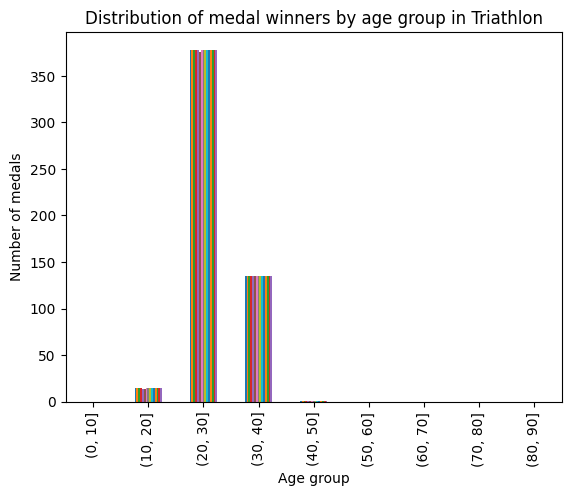

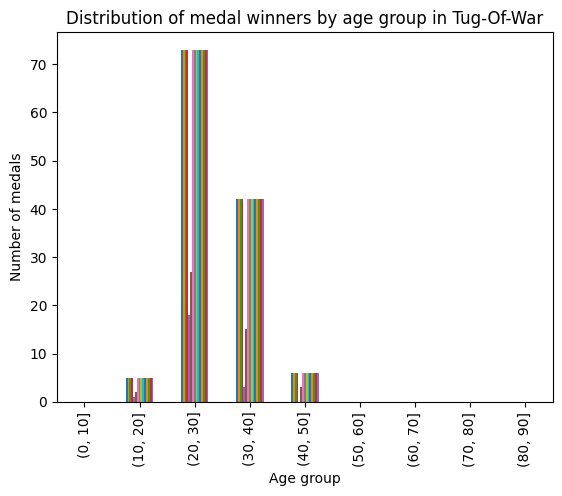

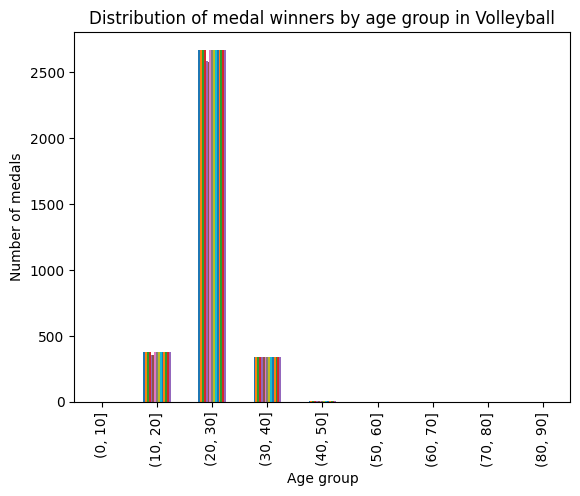

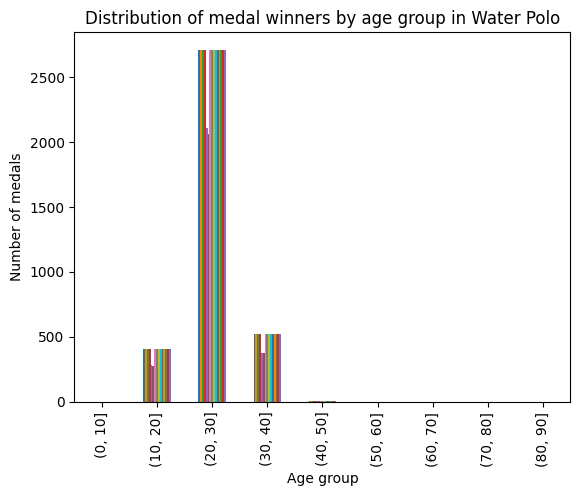

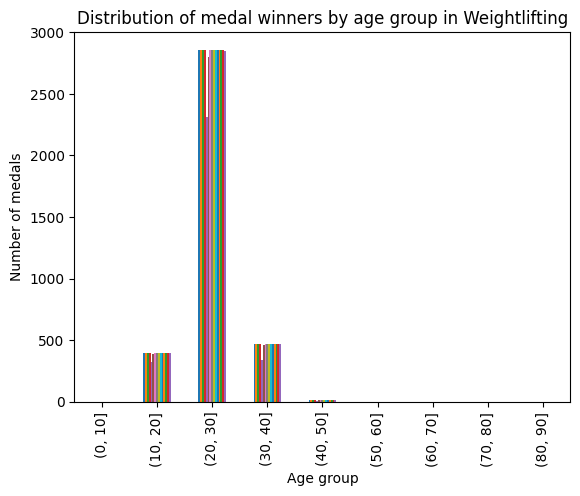

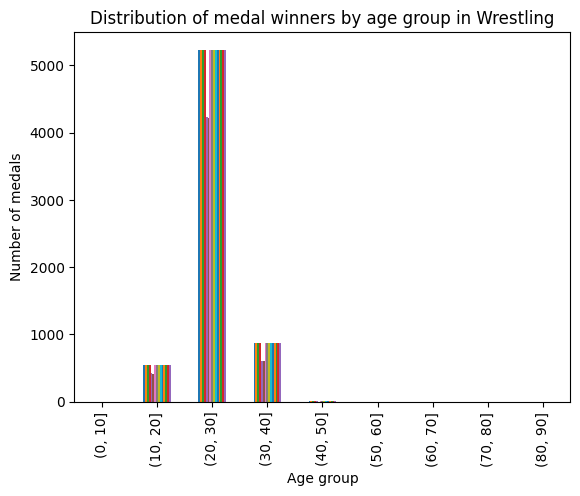

In [39]:
for sport in grouped_df.index.levels[0]:
    plot_df=grouped_df.loc[sport]
    plot_df.plot(kind='bar',legend=None)
    plt.xlabel('Age group')
    plt.ylabel('Number of medals')
    plt.title('Distribution of medal winners by age group in ' + sport)
    plt.show()

###### Sex & Age distribution 

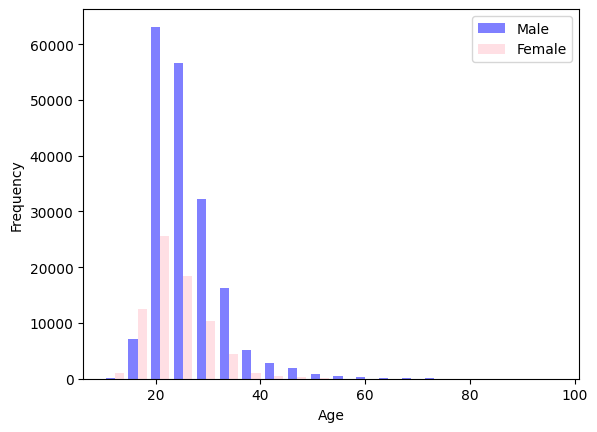

In [40]:
plt.hist([merged[merged['Sex']=='M']['Age'], merged[merged['Sex']=='F']['Age']], 
         bins=20, 
         color=['blue','pink'], 
         alpha=0.5, 
         label=['Male','Female'])

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()







###### Year wise analysis of countries. 

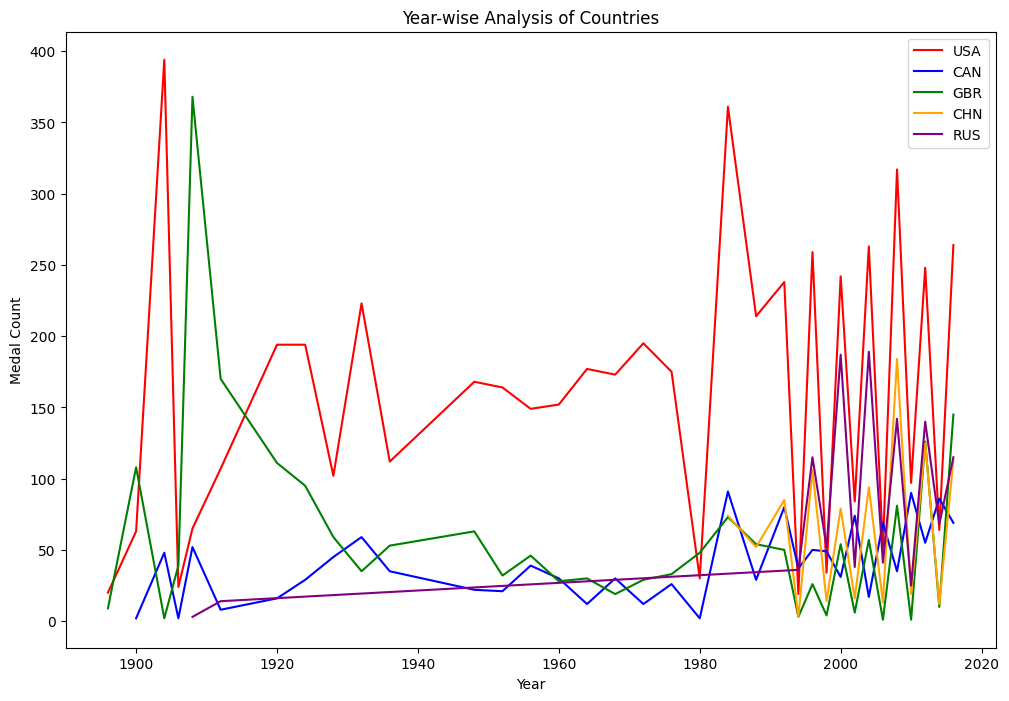

In [41]:
medals = ['Gold', 'Silver', 'Bronze']
merged= merged[merged['Medal'].isin(medals)]

# Group by year and country
grouped = merged.groupby(['Year', 'NOC']).size().reset_index(name='Medal Count')

# Plotting
countries = ['USA', 'CAN', 'GBR', 'CHN', 'RUS']
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots(figsize=(12, 8))

for i, country in enumerate(countries):
    filtered = grouped[grouped['NOC'] == country]
    ax.plot(filtered['Year'], filtered['Medal Count'], label=country, color=colors[i])

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Medal Count')
ax.set_title('Year-wise Analysis of Countries')

plt.show()

#### Number of place countries went with number of medals 

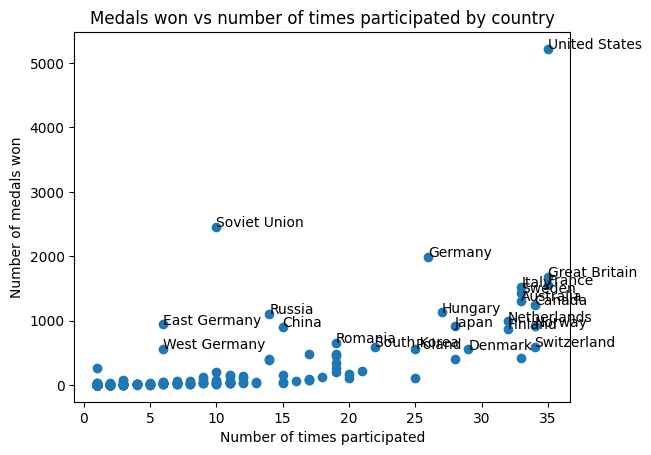

In [42]:
# Group by country and count the number of medals won
medal_counts = merged.groupby('Team')['Medal'].count()

# Group by country and count the number of times they have participated
participation_counts = merged.groupby('Team')['Year'].nunique()

# Plot the scatter plot
plt.scatter(participation_counts, medal_counts)

# Add labels and title
plt.xlabel('Number of times participated')
plt.ylabel('Number of medals won')
plt.title('Medals won vs number of times participated by country')

# Add text labels for select countries
for country, participation, medals in zip(medal_counts.index, participation_counts, medal_counts):
    if medals > 500:
        plt.text(participation, medals, country)
        
# Show the plot
plt.show()


#### Player who won more gold medals. 

In [43]:
goldf_player=golddf.groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)

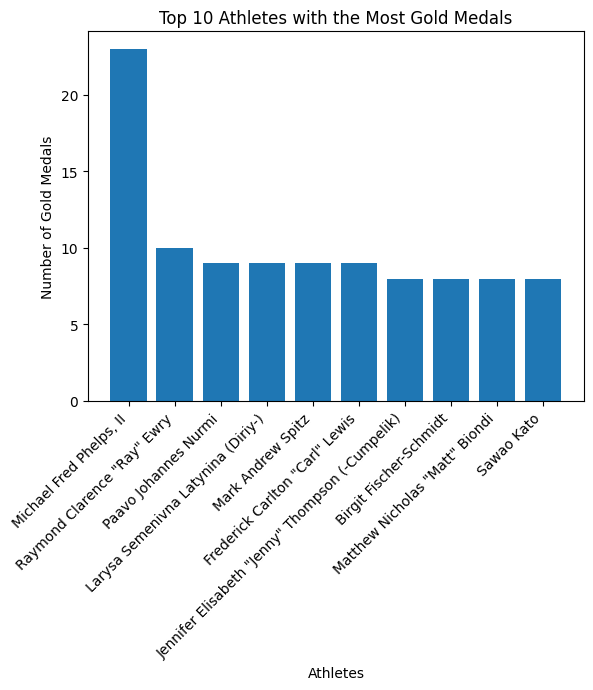

In [45]:
plt.bar(goldf_player.index,goldf_player.values)
plt.title('Top 10 Athletes with the Most Gold Medals')
plt.xlabel('Athletes')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=45, ha='right')
plt.show()